# Genre Classification Algorithm using Numpy, Librosa, Pandas and SciKit Learn

## Import necessary Libraries

In [1]:
import numpy as np
import librosa as lr
import librosa.display as ld
from IPython.display import Audio
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import csv
import pandas as pd

## Example of signal processing being done to every single signal in GTZAN dataset

/var/folders/mq/2x3nqx1s3m7_d6yf0m5rddsw0000gn/T/ipykernel_97623/1347138808.py:12: FutureWarning: Pass y=[ 2.2716861e-06  5.3327208e-06 -7.2473290e-06 ...  1.1170751e-05
  1.2871889e-06  5.4120628e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  specroll = lr.feature.spectral_rolloff(x,sr=sr)
/var/folders/mq/2x3nqx1s3m7_d6yf0m5rddsw0000gn/T/ipykernel_97623/1347138808.py:21: FutureWarning: Pass y=[ 2.2716861e-06  5.3327208e-06 -7.2473290e-06 ...  1.1170751e-05
  1.2871889e-06  5.4120628e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  specband = lr.feature.spectral_bandwidth(x,sr=sr)


Zero Crossing Rate Sum: 0.08719607967751307


/var/folders/mq/2x3nqx1s3m7_d6yf0m5rddsw0000gn/T/ipykernel_97623/1347138808.py:28: FutureWarning: Pass y=[ 2.2716861e-06  5.3327208e-06 -7.2473290e-06 ...  1.1170751e-05
  1.2871889e-06  5.4120628e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = lr.feature.mfcc(x,sr=sr)
/var/folders/mq/2x3nqx1s3m7_d6yf0m5rddsw0000gn/T/ipykernel_97623/1347138808.py:29: FutureWarning: Pass y=[ 2.2716861e-06  5.3327208e-06 -7.2473290e-06 ...  1.1170751e-05
  1.2871889e-06  5.4120628e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma_stft = lr.feature.chroma_stft(x,sr=sr)


spectral centroild shape = (5163,)


/var/folders/mq/2x3nqx1s3m7_d6yf0m5rddsw0000gn/T/ipykernel_97623/1347138808.py:40: FutureWarning: Pass y=[ 2.2716861e-06  5.3327208e-06 -7.2473290e-06 ...  1.1170751e-05
  1.2871889e-06  5.4120628e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sc = lr.feature.spectral_centroid(x,sr=sr)[0]


Text(84.25, 0.5, 'Amplitude')

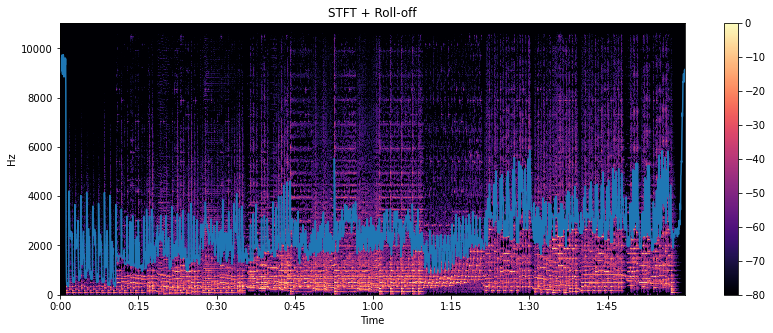

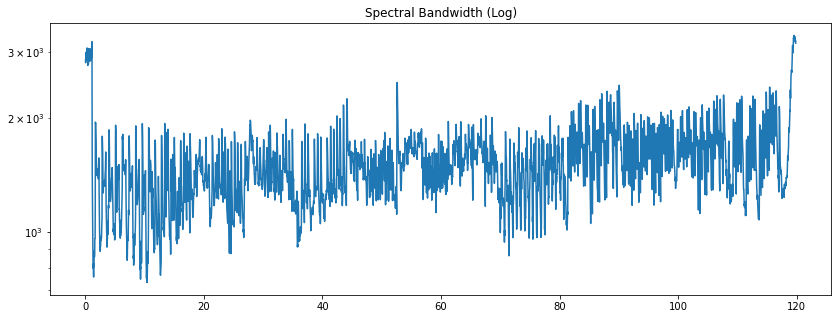

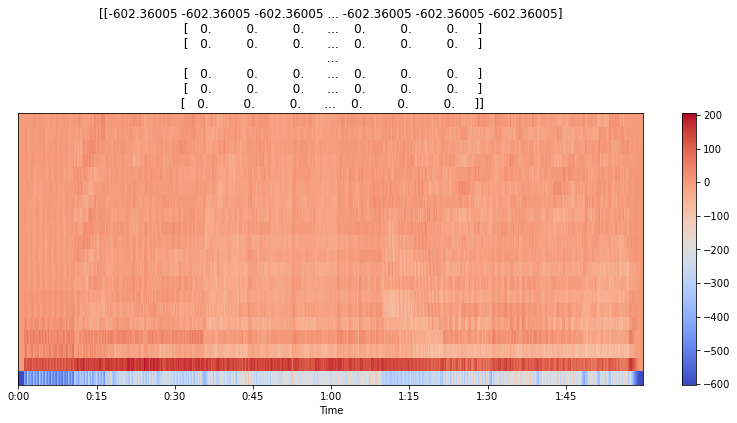

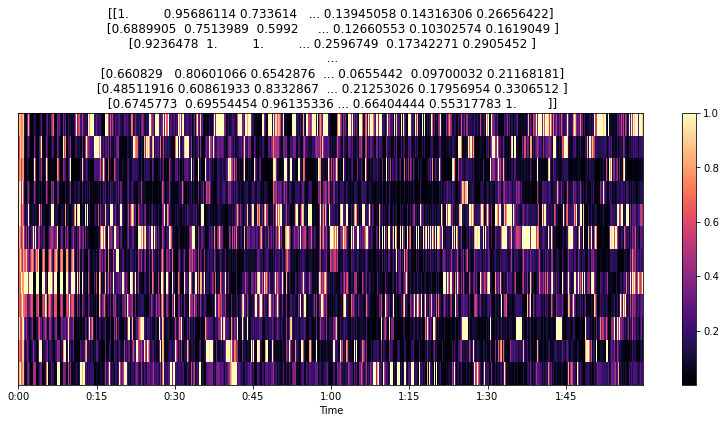

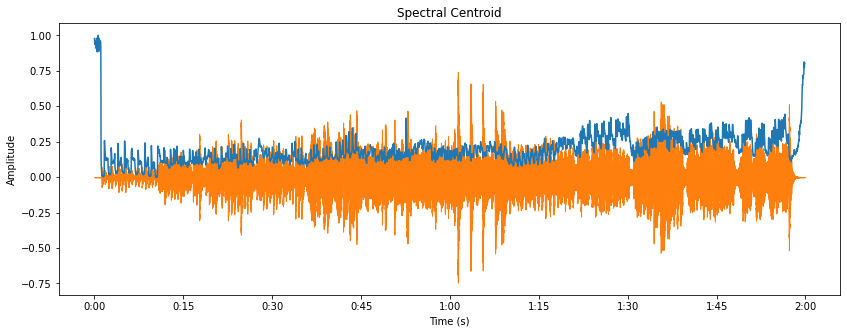

In [2]:
#Load audio file
x, sr = lr.load(lr.ex('nutcracker'))

#-----STFT, MFCC, Spectral Centroid, Chroma STFT, Zero Crossing Rate,etc. extraction-----
#STFT
X_c = lr.stft(x)
plt.figure(figsize=(14,5))
plt.title('STFT + Roll-off')
ld.specshow(lr.amplitude_to_db(abs(X_c),ref=np.max), sr=sr, x_axis = 'time', y_axis = 'hz')

#Spectral Rolloff
specroll = lr.feature.spectral_rolloff(x,sr=sr)
plt.plot(lr.times_like(specroll), specroll[0], label='Roll-off frequency')
plt.colorbar()

#Zero Crossing Rate
zcr = lr.feature.zero_crossing_rate(x)
print(f'Zero Crossing Rate Sum: {np.mean(zcr)}')

#Spectral Bandwidth
specband = lr.feature.spectral_bandwidth(x,sr=sr)
times = lr.times_like(specband)
plt.figure(figsize=(14,5))
plt.title('Spectral Bandwidth (Log)')
plt.semilogy(times, specband[0], label='Spectral bandwidth')

#MFCC and Chroma STFT
mfcc = lr.feature.mfcc(x,sr=sr)
chroma_stft = lr.feature.chroma_stft(x,sr=sr)

for i in mfcc,chroma_stft:
    #Plot features
    plt.figure(figsize=(14,5))
    plt.title(f'{i}')
    ld.specshow(i,sr=sr,x_axis = 'time')
    plt.colorbar()

    
#SPECTRAL CENTROID 
sc = lr.feature.spectral_centroid(x,sr=sr)[0]
print(f'spectral centroild shape = {sc.shape}')
frames = np.arange(len(sc))
t = lr.frames_to_time(frames)
sc_norm = preprocessing.minmax_scale(sc,axis=0)

plt.figure(figsize=(14,5))
plt.plot(t,sc_norm)
ld.waveshow(x)
plt.title('Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')




# 1. Data Preprocessing using GTZAN dataset and CSV file made by ANDRADA OLTEANU (Data Scientist)
 - Includes chroma stft, spectral centroid, spectral rolloff, 5 mfcc's

In [3]:
df = pd.read_csv(f'./Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
df['label'].unique()

df['label'] = df['label'].astype('category')
df['filename'] = df['label'].cat.codes

genre_cat = dict(zip(df.filename.unique(), df.label.unique()))

df = df.drop(['filename'],axis=1)
genre_cat

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

# Label Encoding and Scaling

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

encoder = LabelEncoder()
scaler = StandardScaler()

X = df.iloc[:,1:58] #features
y = df.iloc[:,-1] #genre list

#Split train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

Xtrain_scale = scaler.fit_transform(Xtrain)
Xtest_scale = scaler.transform(Xtest)

Xtrain.shape

(7492, 57)

# K-Nearest Neighbor Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(Xtrain_scale, ytrain)
ma = 100*knn.score(Xtest_scale, ytest)
print(f'KNN mean accuracy = {ma}%')

KNN mean accuracy = 84.02722177742193%


# Multilayer Perceptron Classifier

In [7]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=100)
mlp.fit(Xtrain_scale, ytrain)
mlp.predict(Xtest_scale)
ma = 100*mlp.score(Xtest_scale, ytest)
print(f'MLP mean accuracy = {ma}%')

MLP mean accuracy = 86.38911128903123%


/Users/aaron_escbr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Support Vector Machine Classifier

In [8]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10).fit(Xtrain_scale, ytrain)
ma = 100*svc.score(Xtest_scale, ytest)
print(f'SVC mean accuracy = {ma}%')

#LearningCurveDisplay.from_estimator(SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)

SVC mean accuracy = 91.47317854283426%


# KNN + MLP

In [9]:
from sklearn.ensemble import StackingClassifier
estimators = [('mlp', MLPClassifier(hidden_layer_sizes=100)),('knn', KNeighborsClassifier(n_neighbors = 14))]
clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier())

clf.fit(Xtrain_scale,ytrain)
ma = 100*clf.score(Xtest_scale,ytest)

print(f'KNN + MLP mean accuracy = {ma}%')

/Users/aaron_escbr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaron_escbr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaron_escbr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaron_escbr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


KNN + MLP mean accuracy = 89.59167333867094%


# Hypothesis
- The SVC classifier will yield the best prediction out of all the classifiers due to its mean accuracy of 87%

# Load Audio Signal - You Try it!

In [10]:
# 180Db - Aphex Twin
audio, sr = lr.load(f'./test/180Db_ [130].wav', mono=True, duration=57)
Audio(audio,rate=sr)


# Predictor

In [11]:
a = np.array(x)
data1 = scaler.fit_transform([audio])

for model in [knn,mlp,svc,clf]:
    genre_prediction_model = model.predict(data1.reshape(-57,57))
    print(f'{model} prediction:',genre_prediction_model[0])
 

KNeighborsClassifier(n_neighbors=14) prediction: blues
MLPClassifier(hidden_layer_sizes=100) prediction: disco
SVC(C=10) prediction: disco
StackingClassifier(estimators=[('mlp', MLPClassifier(hidden_layer_sizes=100)),
                               ('knn', KNeighborsClassifier(n_neighbors=14))],
                   final_estimator=MLPClassifier()) prediction: disco
